Jupyter notebook attached to quickly visualise code results

In [1]:
#first run these dependencies to allow cells below to run
import numpy as np
from matplotlib import pyplot as plt
import resource.pulseshape as pulse
import resource.operators as op

In [2]:
#define numerical parameters
b2 = 60 #in ps^2m^-1
stepsize = 1
gamma = 0.02
steps = 400
t = np.linspace(-10,10,1024)
gaussPulseInitial = pulse.GaussianPulse(t,1)

(-0.1, 0.1)

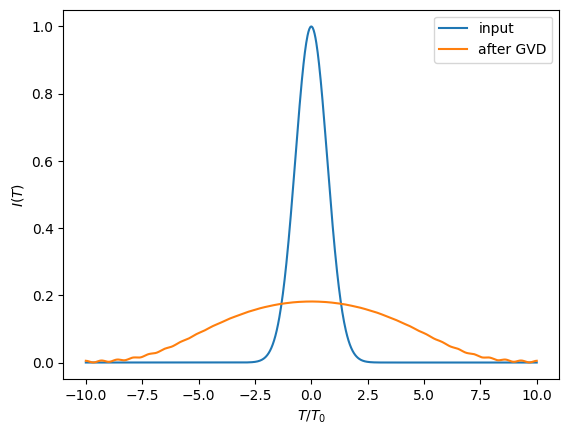

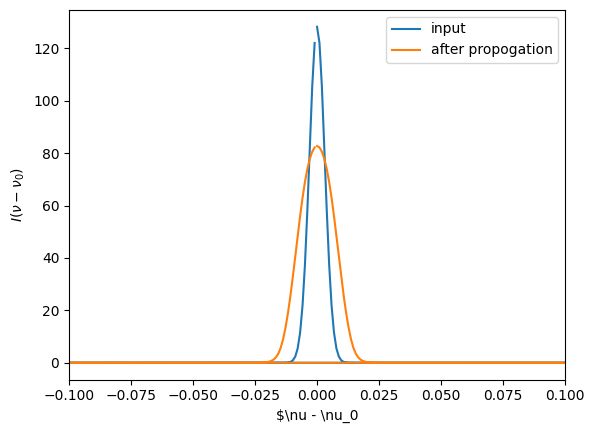

In [3]:
#apply gvd to test pulse 
gaussPulse = op.resolveBasicGVD(b2,stepsize,gaussPulseInitial)
for i in range(steps):
    gaussPulse = np.multiply(gaussPulse,op.SymSplitStepNL(gamma,gaussPulse,stepsize))
    gaussPulse = op.resolveBasicGVD(b2,stepsize,gaussPulse)

initialFT = np.fft.fft(gaussPulseInitial)
propFT = np.fft.fft(gaussPulse)
freqs = np.fft.fftfreq(1024)

#plot results
plt.plot(t,np.square(gaussPulseInitial),label = "input")
plt.plot(t,np.square(np.abs(gaussPulse)),label = "after GVD")
plt.legend(loc="best")
plt.ylabel(r"$I(T)$")
plt.xlabel(r"$T/T_0$")
plt.figure()
plt.plot(freqs,np.abs(initialFT),label = "input")
plt.plot(freqs,np.abs(propFT),label = "after propogation")
plt.legend(loc="best")
plt.ylabel(r"$I(\nu - \nu_0)$")
plt.xlabel(r"$\nu - \nu_0")
plt.xlim(-0.1,0.1)